## Import all dependencies

In [44]:
import os
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

## Pick run

In [49]:
# run = input("Pick run: ")
run = "43"

metric_file = open("../saved_runs/"+run+"/metrics.json")
metrics = json.loads(metric_file.read())
returns = metrics["mean episodic return"]

first_time_stamp = datetime.fromisoformat(returns["timestamps"][0])

y_values = returns["values"]
std = np.std(y_values, axis=0)/np.sqrt(len(y_values))
x_values = [(datetime.fromisoformat(timestamp)-first_time_stamp).seconds / 3600 for timestamp in returns["timestamps"]] # Hours in

5.719555775881395


## Create graph

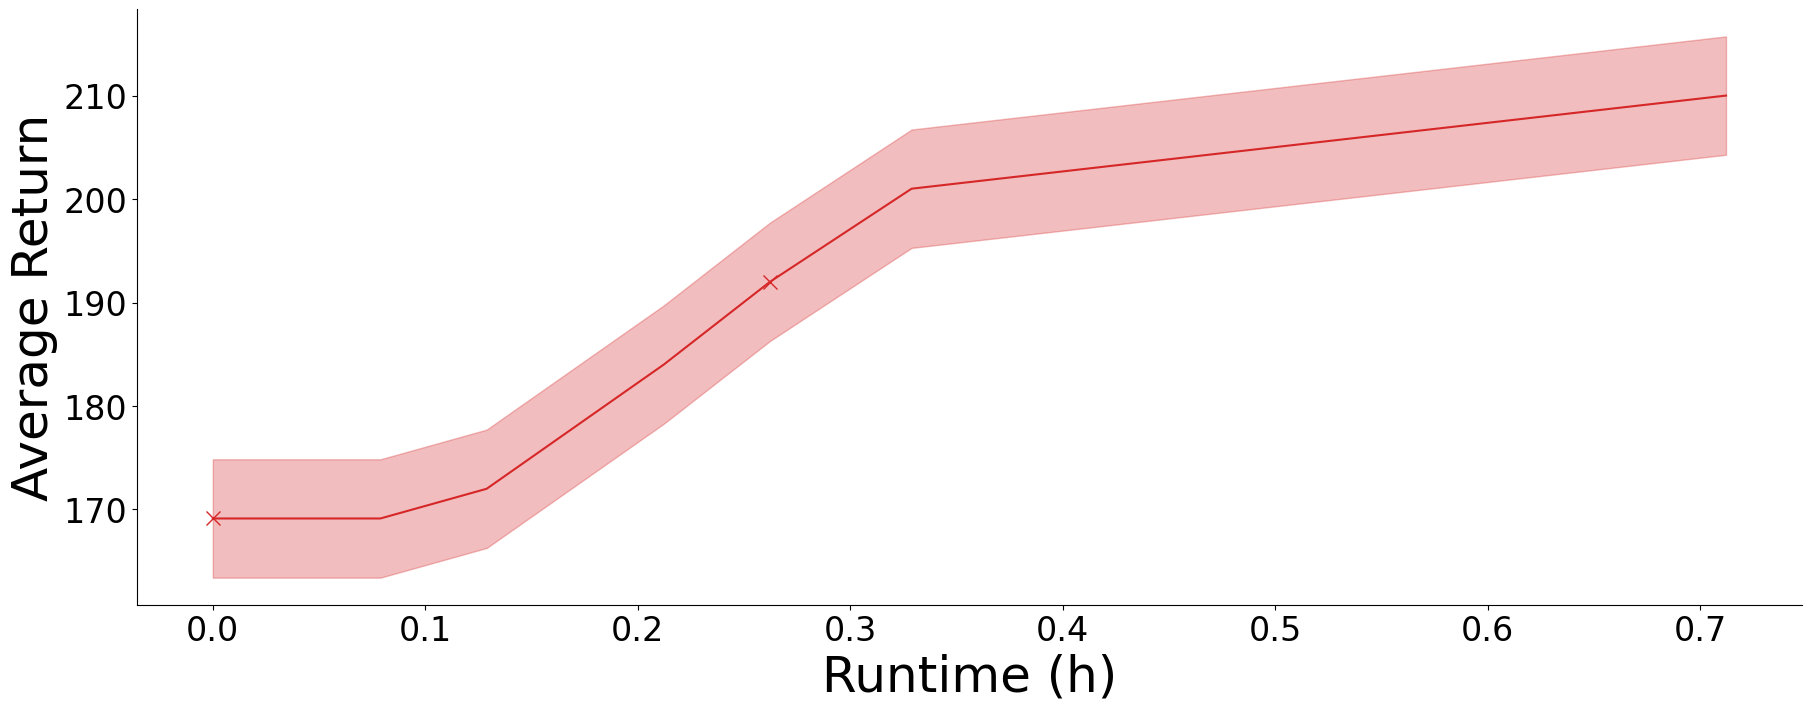

In [55]:
color = "C3"

fig, ax = plt.subplots(1, figsize=(18,7), constrained_layout=True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(labelsize=24)
ax.set_ylabel('Average Return', fontsize=36)
ax.set_xlabel('Runtime (h)', fontsize=36)

ax.fill_between(x_values, y_values-std, y_values+std, alpha=0.3, color=color)
ax.plot(x_values, y_values, marker="X", markevery=4, markersize=10, color=color)